In [3]:
import pandas as pd

In [5]:
data = {
    "Date": pd.date_range(start="2025-08-01", periods=30, freq="D"),
    "Sales": [200, 220, 250, 270, 300, 280, 310, 320, 330, 340,
              360, 380, 400, 420, 410, 430, 440, 460, 480, 500,
              490, 470, 450, 430, 420, 410, 400, 390, 380, 370]
}

In [7]:
df = pd.DataFrame(data)

In [9]:
df

,Date,Sales
0,2025-08-01,200
1,2025-08-02,220
2,2025-08-03,250
3,2025-08-04,270
4,2025-08-05,300
5,2025-08-06,280
6,2025-08-07,310
7,2025-08-08,320
8,2025-08-09,330
9,2025-08-10,340


In [11]:
df.set_index("Date", inplace=True)

In [13]:
df

,Sales
Date,
2025-08-01,200
2025-08-02,220
2025-08-03,250
2025-08-04,270
2025-08-05,300
2025-08-06,280
2025-08-07,310
2025-08-08,320
2025-08-09,330


<Axes: title={'center': 'Daily Sales'}, xlabel='Date'>

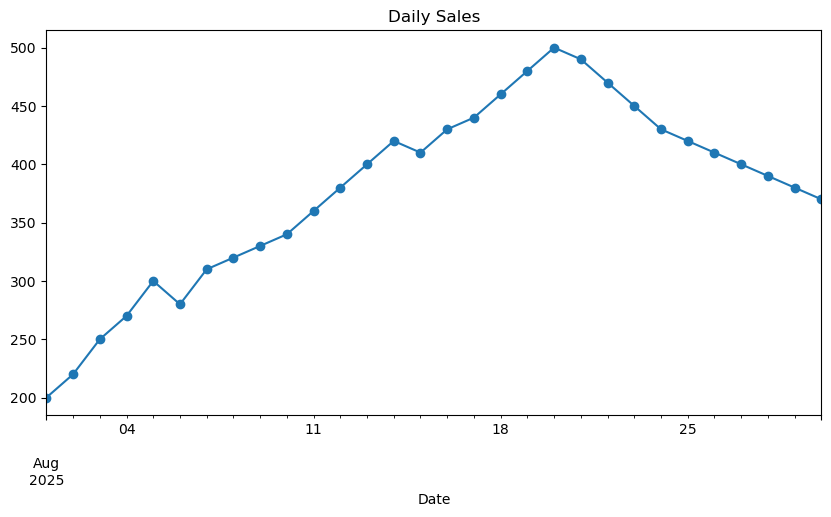

In [15]:
df["Sales"].plot(figsize=(10, 5), title="Daily Sales", marker="o")

In [19]:
import statsmodels.api as sm

In [21]:
decomposition = sm.tsa.seasonal_decompose(df["Sales"], model="additive", period=7)

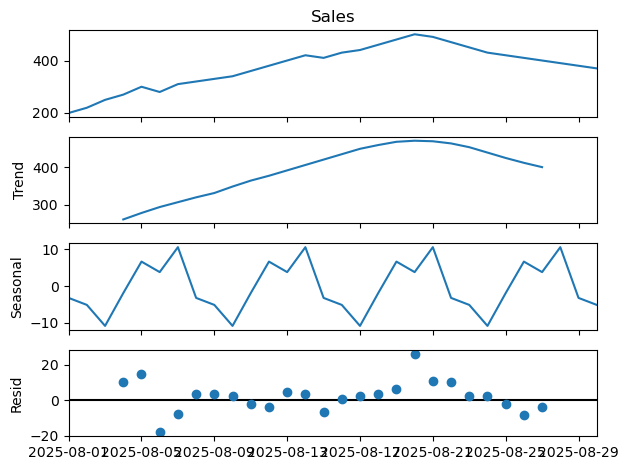

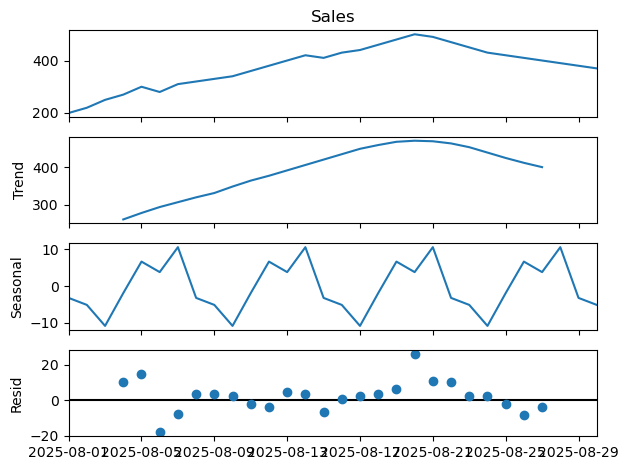

In [25]:
decomposition.plot()

# Time Forcasting with ARIMA

In [36]:
from statsmodels.tsa.arima.model import ARIMA 

In [42]:
model = ARIMA(df["Sales"], order=(2, 1, 2))

E:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [46]:
model_fit = model.fit()

In [50]:
model_fit.forecast(steps=7)

2025-08-31    362.555819
2025-09-01    355.918945
2025-09-02    350.645464
2025-09-03    346.061334
2025-09-04    342.347016
2025-09-05    339.167611
2025-09-06    336.560482
Freq: D, Name: predicted_mean, dtype: float64

# Seasonal Variation

In [52]:
date_rng = pd.date_range(start="2020-01", periods=36, freq="M")
consumption = [300,280,310,350,400,500,550,540,450,400,350,320] * 3 

C:\Users\ABID\AppData\Local\Temp\ipykernel_4828\3256308162.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start="2020-01", periods=36, freq="M")


In [55]:
df = pd.DataFrame({"Date": date_rng, "Consumption": consumption})
df.set_index("Date", inplace=True)

In [57]:
df

,Consumption
Date,
2020-01-31,300
2020-02-29,280
2020-03-31,310
2020-04-30,350
2020-05-31,400
2020-06-30,500
2020-07-31,550
2020-08-31,540
2020-09-30,450


NameError: name 'plt' is not defined

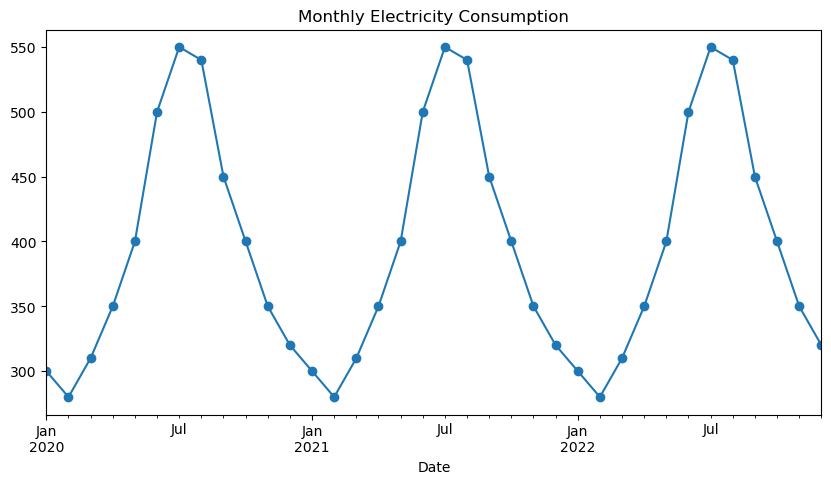

In [59]:
 df["Consumption"].plot(title="Monthly Electricity Consumption", figsize=(10,5), marker="o")
plt.show()

In [61]:
decomposition = sm.tsa.seasonal_decompose(df["Consumption"], model="additive", period=12)

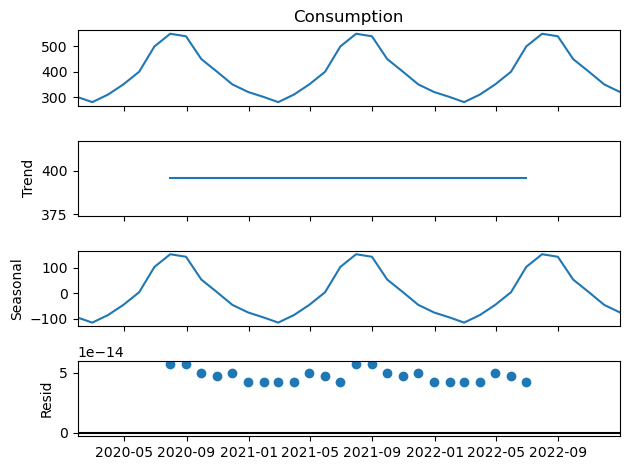

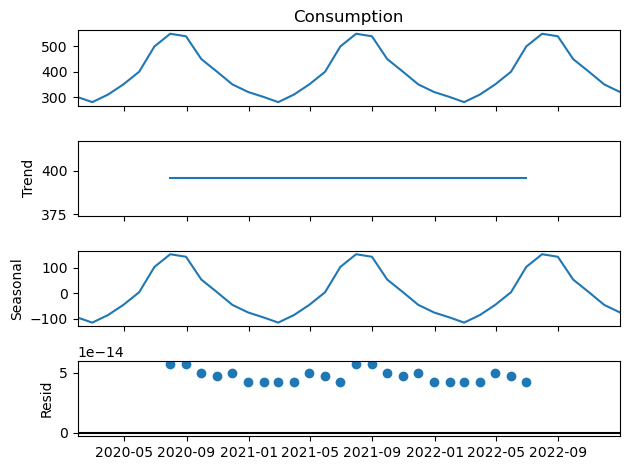

In [63]:
decomposition.plot()